In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
request_df = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv")
fees_df = pd.read_csv("//home/biomedmax/github/project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv")

In [34]:
fees_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [35]:
request_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [36]:
request_df_missing = [request_df['created_at'].isna().any()]
request_df_missing

[False]

In [37]:
request_df["created_at"]

0        2019-12-10 19:05:21.596873+00
1         2019-12-10 19:50:12.34778+00
2         2019-12-10 19:13:35.82546+00
3        2019-12-10 19:16:10.880172+00
4        2020-05-06 09:59:38.877376+00
                     ...              
23965    2020-10-12 13:54:11.686225+00
23966     2020-10-27 14:41:25.73491+00
23967    2020-10-20 07:58:04.006937+00
23968    2020-10-10 05:40:55.700422+00
23969    2020-10-08 14:16:52.155661+00
Name: created_at, Length: 23970, dtype: object

In [38]:
pd.to_datetime(request_df['created_at'])

0       2019-12-10 19:05:21.596873+00:00
1       2019-12-10 19:50:12.347780+00:00
2       2019-12-10 19:13:35.825460+00:00
3       2019-12-10 19:16:10.880172+00:00
4       2020-05-06 09:59:38.877376+00:00
                      ...               
23965   2020-10-12 13:54:11.686225+00:00
23966   2020-10-27 14:41:25.734910+00:00
23967   2020-10-20 07:58:04.006937+00:00
23968   2020-10-10 05:40:55.700422+00:00
23969   2020-10-08 14:16:52.155661+00:00
Name: created_at, Length: 23970, dtype: datetime64[ns, UTC]

In [39]:
#Crear una copia de mi DF de pagos y transformar la columna created_at a fechas
request_df_2 = request_df.copy()

request_df_2['created_at'] = pd.to_datetime(request_df_2['created_at'])
request_df_2['updated_at'] = pd.to_datetime(request_df_2['updated_at'])
request_df_2['moderated_at'] = pd.to_datetime(request_df_2['moderated_at'], errors="coerce")
request_df_2['reimbursement_date'] = pd.to_datetime(request_df_2['reimbursement_date'], errors="coerce")
request_df_2['cash_request_received_date'] = pd.to_datetime(request_df_2['cash_request_received_date'], errors="coerce")
request_df_2['money_back_date'] = pd.to_datetime(request_df_2['money_back_date'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['send_at'] = pd.to_datetime(request_df_2['send_at'], errors="coerce")
request_df_2['reco_creation'] = pd.to_datetime(request_df_2['reco_creation'], errors="coerce")
request_df_2['reco_last_update'] = pd.to_datetime(request_df_2['reco_last_update'], errors="coerce")

request_df_2['user_id'] = request_df_2['user_id'].fillna(request_df_2["deleted_account_id"])

request_df_2['user_id'] = request_df_2["user_id"].astype("int")

In [40]:
request_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     23970 non-null  int64              
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

In [41]:
#Sortear segun fecha de creacion del primer prestamo
print(len(request_df_2["user_id"].unique()))
request_df_2.drop_duplicates(subset=["user_id"])
print(len(request_df_2["user_id"].unique()))

request_df_2 = request_df_2.sort_values(["created_at"])


11793
11793


In [42]:
#Ver agrupacion de usuarios por el mes de su primer adelanto
request_df_2['created_at'].dt.month

#Creo una nueva columna con el mes del adelanto
request_df_2['month_cohort'] = request_df_2['created_at'].dt.to_period("M")

request_df_2.groupby("month_cohort").count()



#request_df_2.groupby("month_cohort").sum(["amount"])


/tmp/ipykernel_109165/667421889.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  request_df_2['month_cohort'] = request_df_2['created_at'].dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
month_cohort,,,,,,,,,,,,,,,,
2019-11,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0
2019-12,289,289,289,289,289,289,273,60,110,174,33,289,0,39,39,39
2020-01,223,223,223,223,223,223,219,47,112,111,71,223,0,33,33,33
2020-02,184,184,184,184,184,184,183,27,59,111,72,184,0,16,16,16
2020-03,244,244,244,244,244,244,237,37,46,169,165,244,0,18,18,18
2020-04,473,473,473,473,473,473,467,55,93,323,320,473,0,59,59,59
2020-05,837,837,837,837,837,837,819,110,152,604,572,837,0,129,129,129
2020-06,2615,2615,2615,2615,2615,2615,2589,364,300,1647,977,2615,0,329,329,329
2020-07,3601,3601,3601,3601,3601,3601,3581,442,319,2009,483,3601,1130,402,402,402


In [43]:
request_df_2["cohort_de_verdad"] = request_df_2.groupby("user_id")["created_at"].transform("min").dt.to_period("M")
request_df_2

/tmp/ipykernel_109165/491215751.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  request_df_2["cohort_de_verdad"] = request_df_2.groupby("user_id")["created_at"].transform("min").dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,month_cohort,cohort_de_verdad
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-11,2019-11
7260,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00:00,1309,NaT,1309.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
10030,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00:00,812,NaT,NaN,NaT,2019-12-11,NaT,regular,NaT,pending,2020-03-20 14:12:53.208246+00:00,2020-12-18 22:47:48.008850+00:00,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18223,27006,50.0,money_back,2020-11-01 23:07:55.231487+00:00,2020-12-18 13:11:35.051472+00:00,55916,NaT,NaN,NaT,2020-11-02,2020-11-12 19:39:20.241980+00:00,instant,2020-11-01 23:08:07.414160+00:00,NaN,NaT,NaT,2020-11,2020-09
21919,27007,100.0,money_back,2020-11-01 23:11:37.788849+00:00,2020-12-18 13:13:10.258884+00:00,39339,NaT,NaN,NaT,2020-11-02,2020-11-29 19:27:43.055298+00:00,instant,2020-11-01 23:12:16.335916+00:00,NaN,NaT,NaT,2020-11,2020-09
7088,27008,50.0,rejected,2020-11-01 23:13:19.286745+00:00,2020-11-02 09:06:37.169489+00:00,24505,2020-11-02 09:06:37.162733+00:00,NaN,NaT,NaT,NaT,instant,2020-11-01 23:13:28.791529+00:00,NaN,NaT,NaT,2020-11,2020-07
14725,27009,60.0,money_back,2020-11-01 23:15:28.102894+00:00,2020-12-18 13:10:18.004190+00:00,100781,NaT,NaN,NaT,NaT,2020-12-02 14:17:37.433540+00:00,instant,2020-11-01 23:16:12.720278+00:00,NaN,NaT,NaT,2020-11,2020-11


In [44]:
#retention = df.pivot(index="cohort", columns="Fecha compra" , values="Num Clients").divide(cohort_sIze_innitial["num clientes"]) ... .divide

Quiero convertir cash_request_id a int; created_at, updated_at, paid_at, from_date,to_date y charge_moment a date y type, status, category y reason a str

TypeError: Invalid object type at position 0

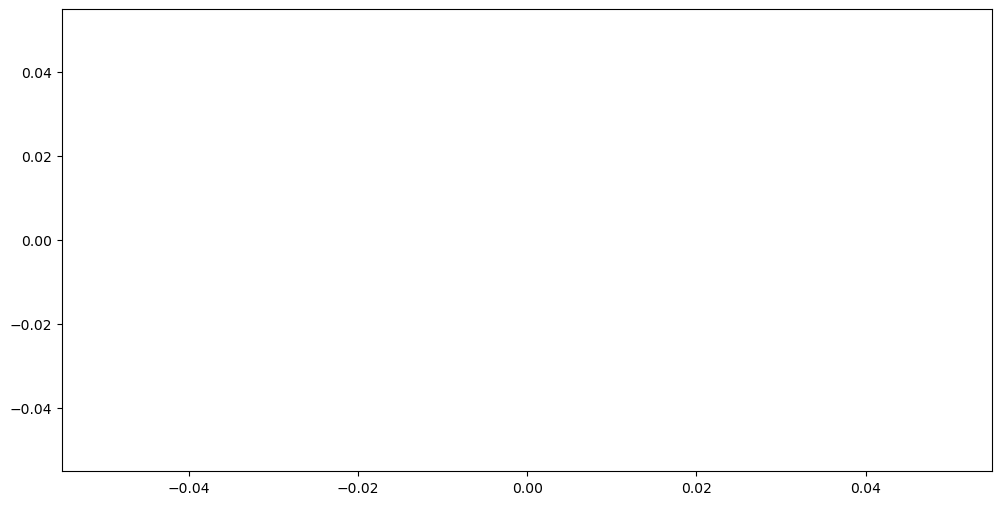

In [45]:
# Histogramas

meses_espanol = [

    "nov_19",

    "dic_19",

    "ene_20",

    "feb_20",

    "mar_20",

    "abr_20",

    "may_20",

    "jun_20",

    "jul_20",

    "ago_20",

    "sep_20",

    "oct_20",

    "nov_20"
]

plt.figure(figsize=(12, 6))

sns.histplot(request_df_2['month_cohort'], alpha=0.5)

plt.title('Distribución de la Cantidad de la Solicitud de Efectivo por Mes', fontsize=16)

plt.xlabel('Mes')

plt.ylabel('Frecuencia')

plt.yticks(fontsize=12)

plt.xticks(ticks=range(12), labels=meses_espanol, rotation=45)

plt.xlim(0, 12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.figure(figsize=(8,4), tight_layout=True)


plt.show()

'\nfor idx, row in transfer_counts.iterrows():\n    # Plot a pie chart for each row\n    plt.pie(row,  startangle=140)\n    plt.show()\n\n    '

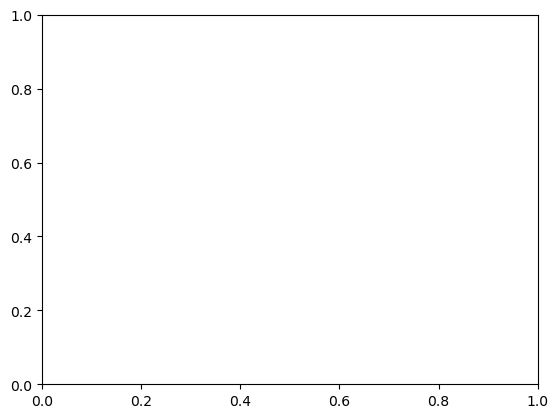

In [ ]:
fig, ax = plt.subplots()

request_df_2.groupby("month_cohort")["transfer_type"].count()
#request_df_2.groupby("transfer_type").count()
transfer_counts = request_df_2.groupby(["month_cohort", "transfer_type"]).size().unstack(fill_value=0)
#ax.pie(request_df_2.groupby("transfer_type").count())
transfer_counts
#plt.figure(figsize=(8, 8))
"""
for idx, row in transfer_counts.iterrows():
    # Plot a pie chart for each row
    plt.pie(row,  startangle=140)
    plt.show()

    """

In [ ]:
transfer_counts

transfer_type,instant,regular
month_cohort,,
2019-11,0,1
2019-12,0,289
2020-01,0,223
2020-02,0,184
2020-03,0,244
2020-04,0,473
2020-05,0,837
2020-06,0,2615
2020-07,344,3257


In [ ]:
transfer_counts.shape


(13, 2)

TypeError: list indices must be integers or slices, not Period

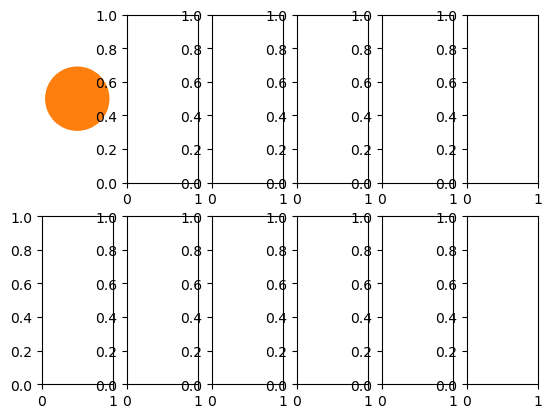

In [ ]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=6)

# Iterate over each row in transfer_counts DataFrame
for i, (idx, row) in enumerate(transfer_counts.iterrows()):

    if i<=5:
        # Plot a pie chart as a subplot for each row
        axs[0,i].pie(row)

        # Equal aspect ratio ensures that pie is drawn as a circle.
        axs[0,i].axis('equal') 

        # Add a title with the month_cohort value
        axs[0,i].set_title(f"Transfers for {meses_espanol[idx-1]}", size=10, rotation = 45, loc="center", pad=10)

    else:
        j=i-6
        axs[1,j].pie(row)

        axs[1,j].axis('equal') 
             
        axs[1,j].set_title(f"Transfers for {meses_espanol[idx-1]}", size=10, rotation = 45)


    

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.legend(["instant", "regular"], bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the pie chart
plt.show()

In [ ]:
pivot_df = transfer_counts.pivot(index=transfer_counts[0], columns='category', values='instant')

KeyError: 0

In [ ]:
transfer_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

NameError: name 'transfer_counts' is not defined

In [ ]:
#request_df_2['cash_request_received_date'] = pd.to_datetime(request_df_2['cash_request_received_date'], errors="coerce")

request_df_2['cash_request_received_date'] = request_df_2['cash_request_received_date'].dt.to_period("M")
request_df_2


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,month_cohort,cohort_de_verdad
7920,3,1.0,canceled,2019-11-19 13:57:53.511561+00:00,2020-12-14 10:25:57.710844+00:00,47,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-11,2019-11
7260,4,100.0,money_back,2019-12-09 14:47:35.190714+00:00,2020-11-04 12:54:52.120014+00:00,1309,NaT,1309.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
10030,6,100.0,direct_debit_rejected,2019-12-10 19:05:48.921042+00:00,2020-12-18 22:47:47.993817+00:00,812,NaT,NaN,NaT,2019-12,NaT,regular,NaT,pending,2020-03-20 14:12:53.208246+00:00,2020-12-18 22:47:48.008850+00:00,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18223,27006,50.0,money_back,2020-11-01 23:07:55.231487+00:00,2020-12-18 13:11:35.051472+00:00,55916,NaT,NaN,NaT,2020-11,2020-11-12 19:39:20.241980+00:00,instant,2020-11-01 23:08:07.414160+00:00,NaN,NaT,NaT,2020-11,2020-09
21919,27007,100.0,money_back,2020-11-01 23:11:37.788849+00:00,2020-12-18 13:13:10.258884+00:00,39339,NaT,NaN,NaT,2020-11,2020-11-29 19:27:43.055298+00:00,instant,2020-11-01 23:12:16.335916+00:00,NaN,NaT,NaT,2020-11,2020-09
7088,27008,50.0,rejected,2020-11-01 23:13:19.286745+00:00,2020-11-02 09:06:37.169489+00:00,24505,2020-11-02 09:06:37.162733+00:00,NaN,NaT,NaT,NaT,instant,2020-11-01 23:13:28.791529+00:00,NaN,NaT,NaT,2020-11,2020-07
14725,27009,60.0,money_back,2020-11-01 23:15:28.102894+00:00,2020-12-18 13:10:18.004190+00:00,100781,NaT,NaN,NaT,NaT,2020-12-02 14:17:37.433540+00:00,instant,2020-11-01 23:16:12.720278+00:00,NaN,NaT,NaT,2020-11,2020-11


In [ ]:
request_df_3 = request_df_2.groupby(["month_cohort", "cash_request_received_date"]).count()
request_df_3

id  amount  status  created_at  \
month_cohort cash_request_received_date                                     
2019-12      2019-12                      166     166     166         166   
             2020-01                        8       8       8           8   
2020-01      2020-01                       99      99      99          99   
             2020-02                       12      12      12          12   
2020-02      2020-02                      100     100     100         100   
             2020-03                       11      11      11          11   
2020-03      2020-03                      166     166     166         166   
             2020-04                        3       3       3           3   
2020-04      2020-04                      269     269     269         269   
             2020-05                       53      53      53          53   
             2020-06                        1       1       1           1   
2020-05      2020-05                      497     497     497         497   
             2020-06                      107     107     107         107   
2020-06      2020-06                     1524    1524    1524        1524   
             2020-07                      123     123     123         123   
2020-07      2020-07                     1866    1866    1866        1866   
             2020-08                      143     143     143         143   
2020-08      2020-08                     1884    1884    1884        1884   
             2020-09                      126     126     126         126   
2020-09      2020-09                     2491    2491    2491        2491   
             2020-10                      169     169     169         169   
2020-10      2020-10                     5874    5874    5874        5874   
             2020-11                      489     489     489         489   
2020-11      2020-11                      108     108     108         108   

                                         updated_at  user_id  moderated_at  \
month_cohort cash_request_received_date                                      
2019-12      2019-12                            166      166           153   
             2020-01                              8        8             7   
2020-01      2020-01                             99       99            95   
             2020-02                             12       12            12   
2020-02      2020-02                            100      100            99   
             2020-03                             11       11            11   
2020-03      2020-03                            166      166           159   
             2020-04                              3        3             3   
2020-04      2020-04                            269      269           265   
             2020-05                             53       53            52   
             2020-06                              1        1             0   
2020-05      2020-05                            497      497           485   
             2020-06                            107      107           101   
2020-06      2020-06                           1524     1524          1515   
             2020-07                            123      123           120   
2020-07      2020-07                           1866     1866          1849   
             2020-08                            143      143           142   
2020-08      2020-08                           1884     1884          1488   
             2020-09                            126      126            90   
2020-09      2020-09                           2491     2491          1781   
             2020-10                            169      169           107   
2020-10      2020-10                           5874     5874           666   
             2020-11                            489      489            28   
2020-11      2020-11                            108      108             9   

           

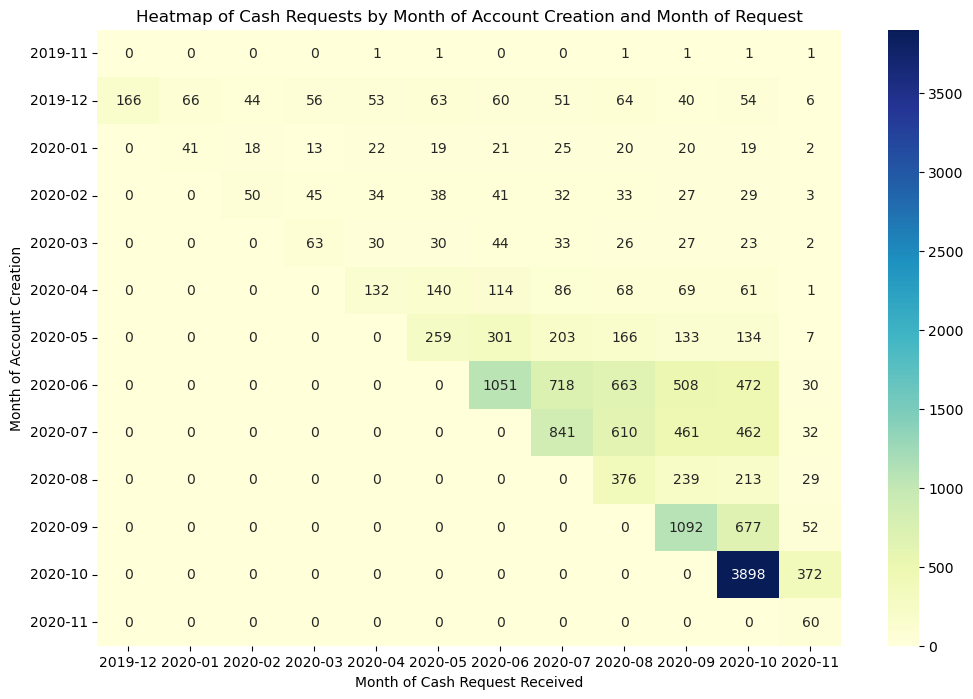

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group by month_cohort and cash_request_received_month and count the occurrences
heatmap_data = request_df_2.groupby(['cohort_de_verdad', 'cash_request_received_date']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Cash Requests by Month of Account Creation and Month of Request')
plt.xlabel('Month of Cash Request Received')
plt.ylabel('Month of Account Creation')
plt.show()

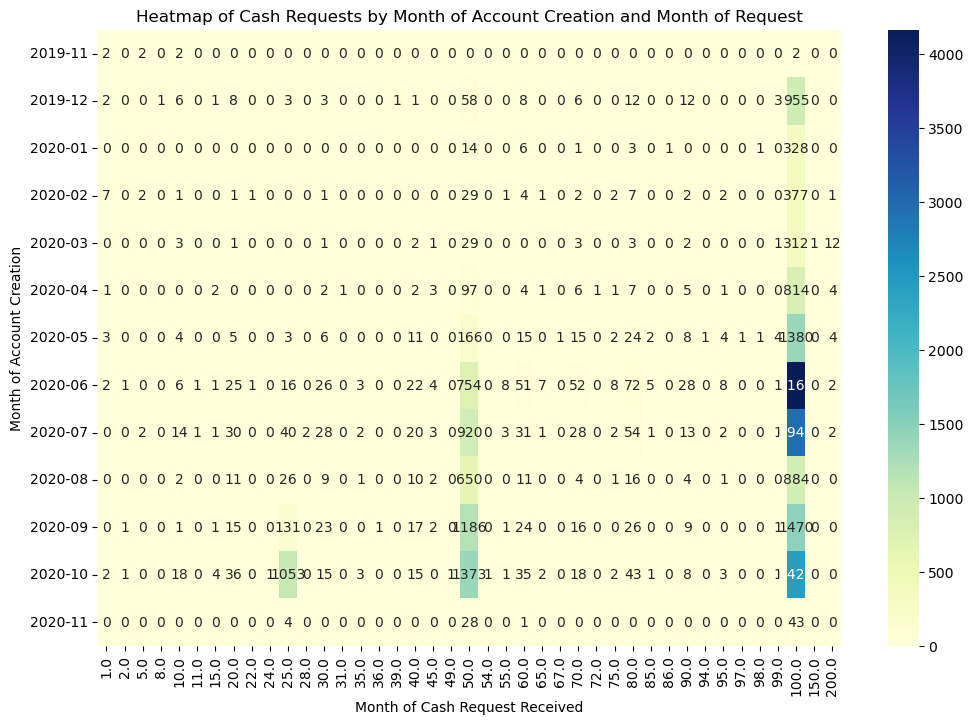

In [ ]:
# Group by month_cohort and cash_request_received_month and count the occurrences
heatmap_data2 = request_df_2.groupby(['cohort_de_verdad', 'amount']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data2, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Cash Amount of Account Creation and Month of Request')
plt.xlabel('Month of Cash Request Received')
plt.ylabel('Month of Account Creation')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

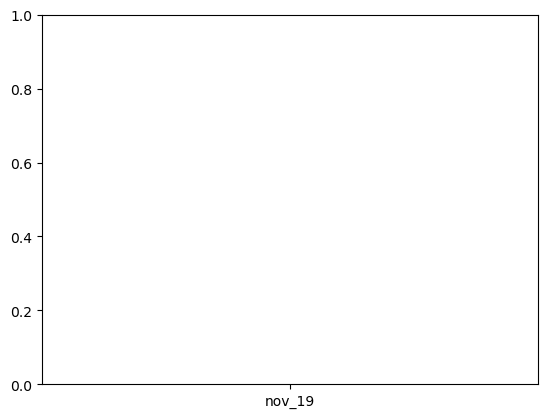

In [ ]:


subset_missing_values = pd.isna(fees_df['cash_request_id'])
subset_missing_values

# Assuming fees_df is your DataFrame
subset_missing_values = fees_df[fees_df['cash_request_id'].isna()]

# Display the subset
print(subset_missing_values)

         id  cash_request_id             type     status category  \
1911   2990              NaN  instant_payment  cancelled      NaN   
1960   3124              NaN  instant_payment  cancelled      NaN   
4605   5185              NaN  instant_payment  cancelled      NaN   
11870  3590              NaN  instant_payment  cancelled      NaN   

       total_amount                              reason  \
1911            5.0  Instant Payment Cash Request 11164   
1960            5.0  Instant Payment Cash Request 11444   
4605            5.0  Instant Payment Cash Request 11788   
11870           5.0  Instant Payment Cash Request 12212   

                          created_at                     updated_at paid_at  \
1911   2020-08-06 22:42:34.525373+00  2020-11-04 16:01:17.296048+00     NaN   
1960   2020-08-08 06:33:06.244651+00  2020-11-04 16:01:08.332978+00     NaN   
4605   2020-08-26 09:39:37.362933+00  2020-11-04 16:01:36.492576+00     NaN   
11870  2020-08-12 14:20:06.657075+00  2020

In [47]:
fees_df_2= fees_df.dropna(subset=['cash_request_id'])
fees_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21057 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21057 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21057 non-null  object 
 3   status           21057 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21057 non-null  float64
 6   reason           21057 non-null  object 
 7   created_at       21057 non-null  object 
 8   updated_at       21057 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21057 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ MB


In [ ]:
fees_df_2["cash_request_id"] = fees_df_2['cash_request_id'].astype(int)
#fees_df["created_at"] = pd.to_datetime(fees_df["created_at"])
#fees_df["created_at"] = pd.to_datetime(fees_df["created_at"])
fees_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21057 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21057 non-null  int64  
 1   cash_request_id  21057 non-null  int64  
 2   type             21057 non-null  object 
 3   status           21057 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21057 non-null  float64
 6   reason           21057 non-null  object 
 7   created_at       21057 non-null  object 
 8   updated_at       21057 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21057 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.2+ MB


/tmp/ipykernel_38254/1261044098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_df_2["cash_request_id"] = fees_df_2['cash_request_id'].astype(int)


In [ ]:
# Ver que cuantos valores diferentes hay en cada columna
columnas_fees = fees_df_2.columns.tolist()
for i in columnas_fees:
    print(f"{fees_df_2[i].value_counts().head(10)}")

id
13301    1
13095    1
4325     1
3107     1
6467     1
6461     1
11489    1
9976     1
4752     1
832      1
Name: count, dtype: int64
cash_request_id
12225    35
5006     28
4410     24
12452    23
11376    21
2358     19
11746    17
15319    16
8713     15
11968    15
Name: count, dtype: int64
type
instant_payment    11095
postpone            7766
incident            2196
Name: count, dtype: int64
status
accepted     14841
cancelled     4934
rejected      1194
confirmed       88
Name: count, dtype: int64
category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64
total_amount
5.0     21056
10.0        1
Name: count, dtype: int64
reason
rejected direct debit               1599
month delay on payment - 9/2020      283
month delay on payment - 8/2020      203
month delay on payment - 10/2020     102
Postpone Cash Request 12225           34
Postpone Cash Request 5006            25
Postpone Cash Request 4410            23
Postpone Cash Request 1137

ValueError: could not convert string to float: 'instant_payment'

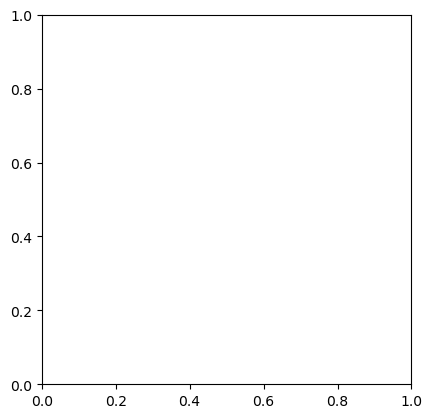

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(fees_df_2["type"], labels = ["ada","qead","qe"], colors = colors, autopct='%.0f%%')
plt.show()

In [49]:
fees_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21057 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21057 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21057 non-null  object 
 3   status           21057 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21057 non-null  float64
 6   reason           21057 non-null  object 
 7   created_at       21057 non-null  object 
 8   updated_at       21057 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21057 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ MB


In [79]:
result_df = fees_df_2.join(request_df_2.set_index('id'), on='cash_request_id', lsuffix='_left', rsuffix='_right')


In [80]:
result_df["category"].fillna("No incident", inplace=True)

/tmp/ipykernel_109165/2493841347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result_df["category"].fillna("No incident", inplace=True)


In [83]:
#result_df.groupby("category").count()
result_df.groupby(["category", "cohort_de_verdad"]).count()

id  cash_request_id  type  \
category               cohort_de_verdad                                
No incident            2019-11             10               10    10   
                       2019-12            258              258   258   
                       2020-01            116              116   116   
                       2020-02            169              169   169   
                       2020-03            142              142   142   
                       2020-04            394              394   394   
                       2020-05            952              952   952   
                       2020-06           3723             3723  3723   
                       2020-07           2859             2859  2859   
                       2020-08           1270             1270  1270   
                       2020-09           3025             3025  3025   
                       2020-10           5876             5876  5876   
                       2020-11             67               67    67   
month_delay_on_payment 2019-12             19               19    19   
                       2020-01              6                6     6   
                       2020-02              9                9     9   
                       2020-03             10               10    10   
                       2020-04             49               49    49   
                       2020-05             78               78    78   
                       2020-06            234              234   234   
                       2020-07            171              171   171   
                       2020-08             21               21    21   
rejected_direct_debit  2019-12             34               34    34   
                       2020-01              9                9     9   
                       2020-02             15               15    15   
                       2020-03             22               22    22   
                       2020-04             70               70    70   
                       2020-05            156              156   156   
                       2020-06            542              542   542   
                       2020-07            405              405   405   
                       2020-08            128              128   128   
                       2020-09            195              195   195   
                       2020-10             23               23    23   

                                         status_left  total_amount  reason  \
category               cohort_de_verdad                                      
No incident            2019-11                    10            10      10   
                       2019-12                   258           258     258   
                       2020-01                   116           116     116   
                       2020-02                   169           169     169   
                       2020-03                   142           142     142   
                       2020-04                   394           394     394   
                       2020-05                   952           952     952   
                       2020-06                  3723          3723    3723   
                       2020-07                  2859          2859    2859   
                       2020-08                  1270          1270    1270   
                       2020-09                  3025          3025    3025   
                       2020-10                  5876          5876    5876   
                       2020-11                    67            67      67   
month_delay_on_payment 2019-12                    19            19      19   
                       2020-01                     6             6       6   
                       2020-02                     9             9       9   
                       2020-03                    10            10      10   
                       2020-04          

In [110]:
subset_no_incident = result_df[result_df['category'] == "No incident"]
subset_no_incident.groupby(["cohort_de_verdad"]).count()

subset_rejected_month_delay = result_df[result_df['category'] == "month_delay_on_payment"]
subset_rejected_month_delay.groupby(["cohort_de_verdad"]).count()

subset_rejected_direct_debit = result_df[result_df['category'] == "rejected_direct_debit"]
subset_rejected_direct_debit.groupby(["cohort_de_verdad"]).count()


,id,cash_request_id,type,status_left,category,total_amount,reason,created_at_left,updated_at_left,paid_at,...,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,month_cohort
cohort_de_verdad,,,,,,,,,,,,,,,,,,,,,
2019-12,34,34,34,34,34,34,34,34,34,29,...,2,7,34,24,34,14,34,34,34,34
2020-01,9,9,9,9,9,9,9,9,9,7,...,0,1,9,6,9,2,9,9,9,9
2020-02,15,15,15,15,15,15,15,15,15,13,...,0,4,15,13,15,8,15,15,15,15
2020-03,22,22,22,22,22,22,22,22,22,19,...,3,4,22,16,22,10,22,22,22,22
2020-04,70,70,70,70,70,70,70,70,70,57,...,6,9,70,54,70,23,70,70,70,70
2020-05,156,156,156,156,156,156,156,156,156,133,...,18,26,156,127,156,48,156,156,156,156
2020-06,542,542,542,542,542,542,542,542,542,456,...,65,68,537,408,542,218,541,541,541,542
2020-07,405,405,405,405,405,405,405,405,405,328,...,26,51,403,276,405,259,405,405,405,405
2020-08,128,128,128,128,128,128,128,128,128,114,...,5,18,127,78,128,119,127,127,127,128


In [118]:
result_df.groupby("cohort_de_verdad").count()["id"]

cohort_de_verdad
2019-11      10
2019-12     311
2020-01     131
2020-02     193
2020-03     174
2020-04     513
2020-05    1186
2020-06    4499
2020-07    3435
2020-08    1419
2020-09    3220
2020-10    5899
2020-11      67
Freq: M, Name: id, dtype: int64

In [225]:
#Porcentage de rejected por direct debit por cohort
y1=subset_rejected_direct_debit.groupby(["cohort_de_verdad"]).count()["id"]/result_df.groupby("cohort_de_verdad").count()["id"]*100
#y1.reset_index()

In [226]:
y2=subset_rejected_month_delay.groupby(["cohort_de_verdad"]).count()["id"]/result_df.groupby("cohort_de_verdad").count()["id"]*100
#y2.reset_index()

In [231]:
y2.keys()


PeriodIndex(['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11'],
            dtype='period[M]', name='cohort_de_verdad')

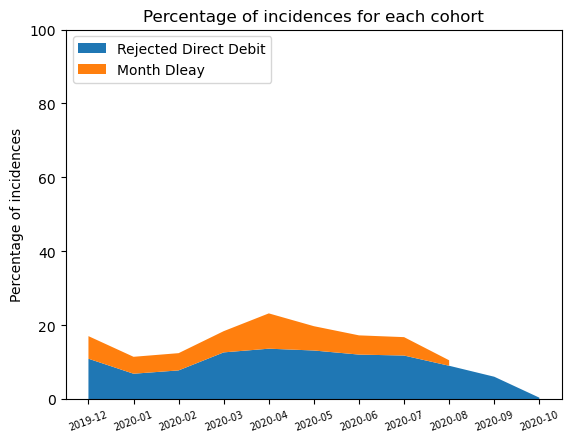

In [244]:
# Basic stacked area chart.
x=['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04',
             '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10',
             '2020-11']
plt.stackplot(x,y1,y2, labels=["Rejected Direct Debit", "Month Dleay"])
plt.ylim(0, 100)
plt.title("Percentage of incidences for each cohort")
plt.ylabel("Percentage of incidences")
plt.xticks(fontsize=7, rotation=20)
plt.legend(loc='upper left')


In [275]:
fees_by_cohort=result_df.groupby("cohort_de_verdad")["total_amount"].sum()
fees_by_cohort=fees_by_cohort.reset_index()
fees_by_cohort

,cohort_de_verdad,total_amount
0,2019-11,50.0
1,2019-12,1555.0
2,2020-01,655.0
3,2020-02,965.0
4,2020-03,870.0
5,2020-04,2565.0
6,2020-05,5930.0
7,2020-06,22495.0
8,2020-07,17175.0
9,2020-08,7095.0


In [283]:
fees_by_cohort["total_amount"]

0        50.0
1      1555.0
2       655.0
3       965.0
4       870.0
5      2565.0
6      5930.0
7     22495.0
8     17175.0
9      7095.0
10    16100.0
11    29500.0
12      335.0
Name: total_amount, dtype: float64

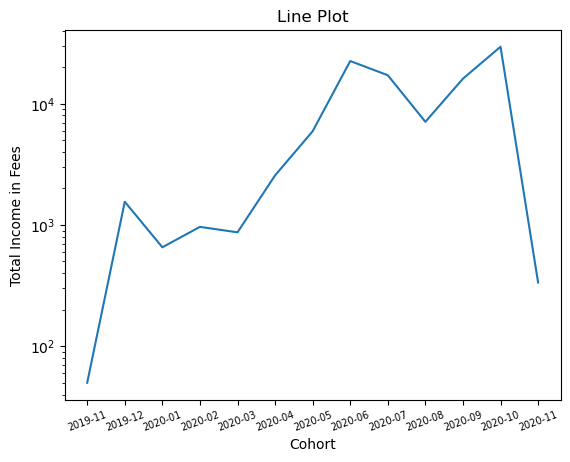

In [293]:
# Convert Period objects to strings
x_values = fees_by_cohort['cohort_de_verdad'].astype(str).values
y_values = fees_by_cohort['total_amount'].values

# Plotting the line plot
plt.plot(x_values, y_values)

# Adding labels and title
plt.xlabel('Cohort')
plt.ylabel('Total Income in Fees')
plt.title('Line Plot')
plt.xticks(fontsize=7, rotation=20)

plt.yscale('log')


# Displaying the plot
plt.show()
